In [ ]:
import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Books_seperate.csv')
df.drop(['subtitle','isSecondHand'], axis=1,inplace=True)
df['publication_date']= pd.to_datetime(df['publication_date'])
print("Dataset Shape",df.shape)
df.head()

Dataset Shape (1250, 12)


,publication_date,euro_price,type,category,name,author,publisher,language,no_of_pages,weight,salesRank,short_blurb
0,2020-08-20,9.60,Paperback,history,The Royal Netherlands Navy of World War II,"Ryan Noppen, Paul Wright (illustrator)",Bloomsbury Publishing (UK),English,48,5.0,25358.0,"In the late 19th and early 20th century, a com..."
1,2020-01-21,2.90,Paperback,literature,Fascism and Democracy,George Orwell (author),Penguin Books Ltd,English,48,5.6,2852.0,'Fascism and Democracy' collects five brillian...
2,2020-11-05,10.77,Paperback,fiction,Interior Chinatown,Charles Yu (author),Europa Editions (UK) Ltd.,English,288,10.0,839.0,"A deeply personal novel about race, pop cultur..."
3,2020-11-09,12.92,Paperback,artanddesign,Railroad Depots of Northwest Pennsylvania,Dan West (author),Arcadia Publishing,English,128,16.0,3965.0,From 1860 until the decline of the railroads n...
4,2020-11-09,12.92,Paperback,sports,Lost Ski Areas of Tahoe and Donner,Ingrid P. Wicken (author),Arcadia Publishing,English,192,19.0,3371.0,"At the beginning of the twentieth century, Lak..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   publication_date  1250 non-null   datetime64[ns]
 1   euro_price        1250 non-null   float64       
 2   type              1250 non-null   object        
 3   category          1250 non-null   object        
 4   name              1250 non-null   object        
 5   author            1248 non-null   object        
 6   publisher         1248 non-null   object        
 7   language          1177 non-null   object        
 8   no_of_pages       1250 non-null   int64         
 9   weight            1250 non-null   float64       
 10  salesRank         1080 non-null   float64       
 11  short_blurb       1214 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 117.3+ KB


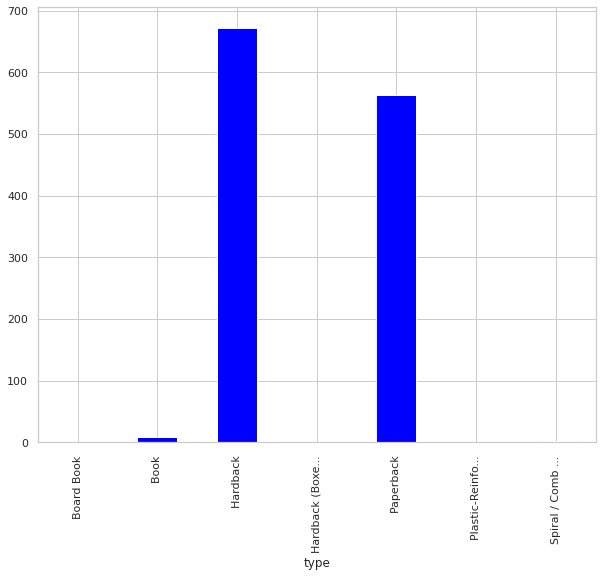

In [ ]:
#print(df[df['publication_date']<'01-01-2015']['name'].count())
#print(df[df['publication_date']>'01-01-2020']['name'].count())
data = df.groupby("type")["name"].count()
data.plot.bar(figsize=(10,8), color='blue')

In [ ]:
data = df.groupby("language")["name"].count()
data

language
English                  1159
English,French              4
English,French,German       4
English,German              2
English,Italian             1
French                      1
German                      4
Spanish                     1
Welsh                       1
Name: name, dtype: int64

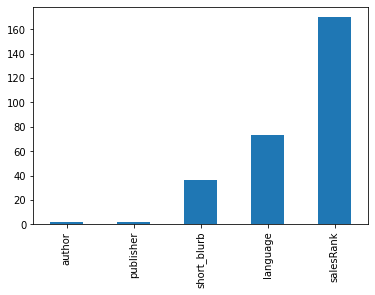

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

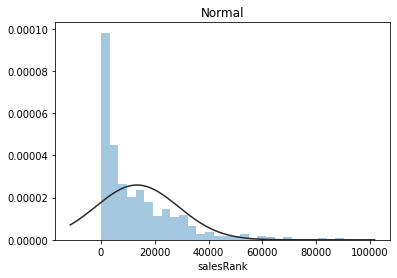

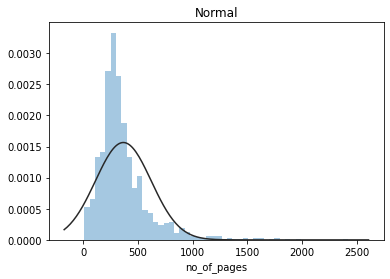

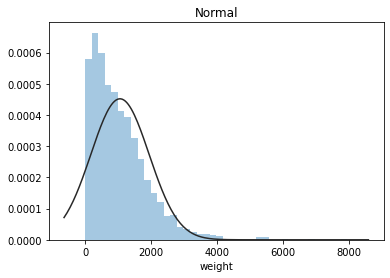

In [ ]:
import scipy.stats as st
y = df['salesRank']
plt.figure(3); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

y = df['no_of_pages']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

y = df['weight']
plt.figure(1); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

Finding out major suppliers 

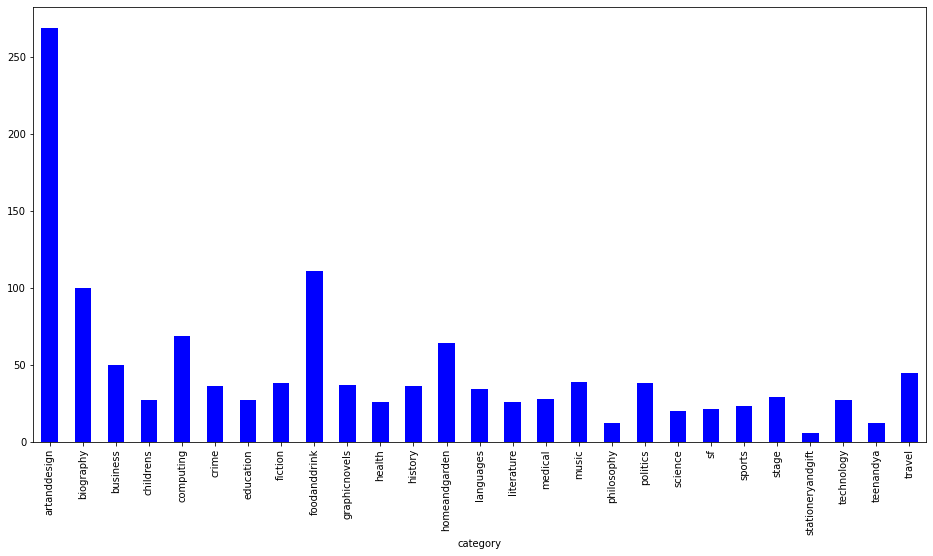

In [ ]:
data = df.groupby("category")['category'].count()
data.plot.bar(figsize=(16,8), color='b')

Major Publishers

Largest Suppliers vs No. of books published


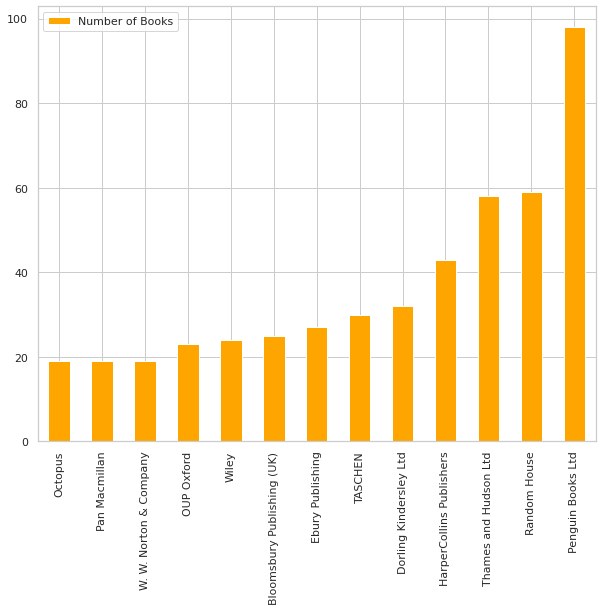

,Number of Books
Bloomsbury Publishing (UK),25
Penguin Books Ltd,98
OUP Oxford,23
Random House,59
HarperCollins Publishers,43
Ebury Publishing,27
Octopus,19
Pan Macmillan,19
W. W. Norton & Company,19
Dorling Kindersley Ltd,32


In [ ]:
l =[]
major_suppliers = {}
for i in df['publisher'].unique():
  l.append(df[df['publisher']==i].shape[0])
  if df[df['publisher']==i].shape[0]>18:
    major_suppliers[i] = df[df['publisher']==i].shape[0]
print("Largest Suppliers vs No. of books published")
alpah = pd.DataFrame.from_dict(major_suppliers, orient='index', columns={'Number of Books'})
alpah.sort_values(by='Number of Books').plot.bar(figsize=(10,8), color='orange')
plt.show()

alpah

In [ ]:
l['AveragePrice(Euro)'].sort_values().plot.bar(figsize=(10,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa17998d550>],
      dtype=object)

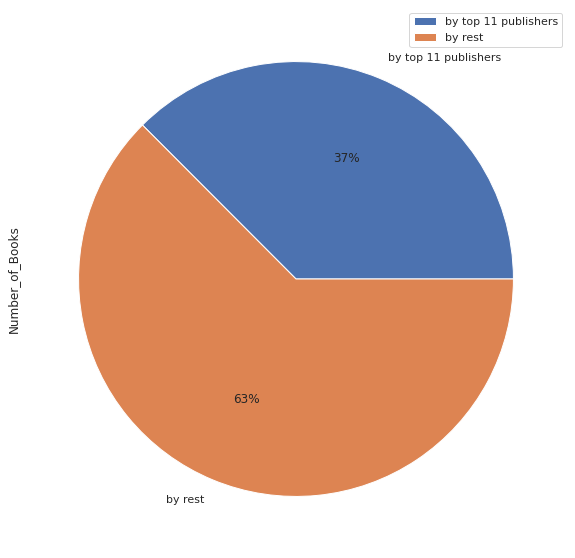

In [ ]:
data = pd.DataFrame.from_dict({'by top 11 publishers':476,'by rest':794}, orient='index',columns={'Number_of_Books'})
data.plot.pie(subplots=True, autopct='%1.0f%%', figsize=(16,10))

Average Price vs Average SalesRank for each genre

In [ ]:
avg_pr = {}
avg_rank = {}
for i in df['category'].unique():
  p = df[df['category']==i]['euro_price']
  avg_pr[i]=round(p.sum()/p.count(),3)

for i in df['category'].unique():
  p = df[df['category']==i]['salesRank']
  avg_rank[i]=round(p.sum()/p.count(),3)

avg = pd.DataFrame.from_dict(avg_pr, orient='index', columns={'AveragePrice(Euro)'})
avg['AverageSalesRank'] = pd.DataFrame.from_dict(avg_rank, orient='index')
avg.sort_values(by='AverageSalesRank', ascending=True)

,AveragePrice(Euro),AverageSalesRank
fiction,11.205,2560.526
stationeryandgift,18.740,4162.400
sf,16.626,7010.810
biography,17.224,7844.160
literature,13.792,8108.192
health,24.040,8322.346
foodanddrink,27.476,8500.544
history,26.825,9604.972
teenandya,12.071,10165.000
philosophy,15.562,10511.250


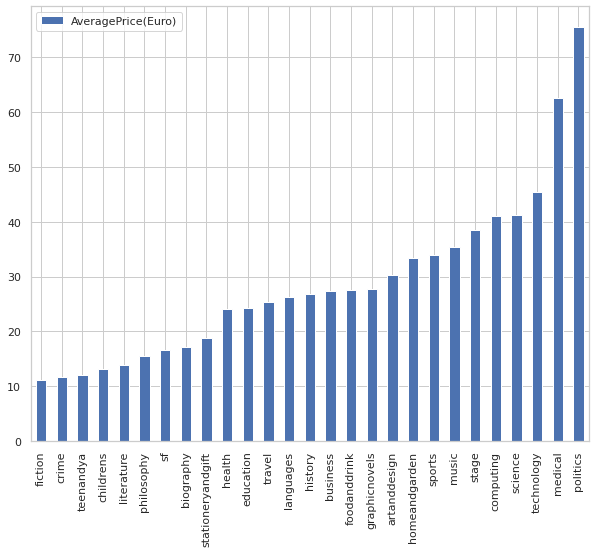

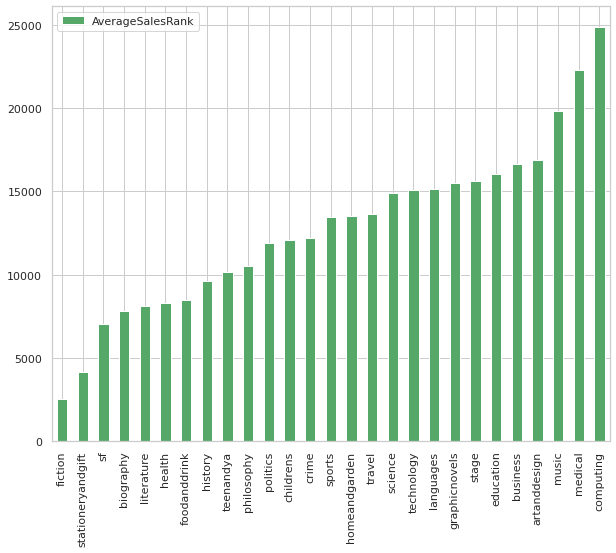

In [ ]:
plt.figure(1)
avg['AveragePrice(Euro)'].sort_values().plot.bar(figsize=(10,8))
plt.legend()

plt.figure(2)
avg['AverageSalesRank'].sort_values().plot.bar(figsize=(10,8), color='g')
plt.legend()

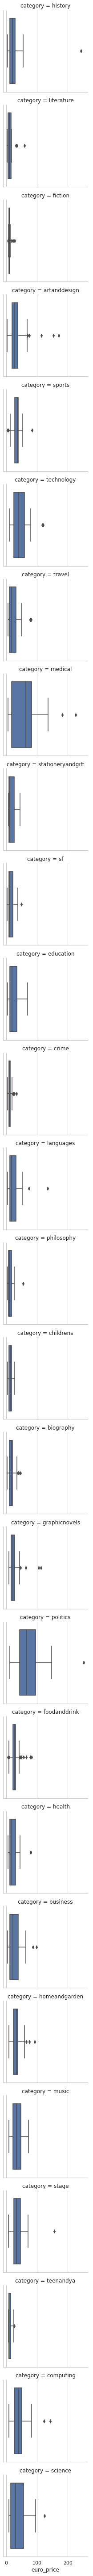

In [ ]:
g = sns.FacetGrid(df, row = 'category')
g.map(sns.boxplot, 'euro_price')
g.add_legend()

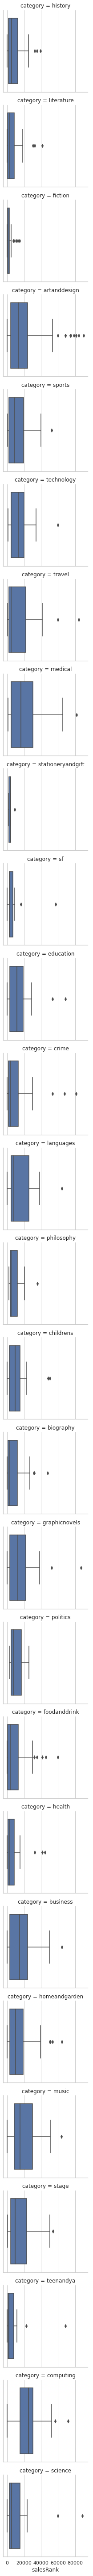

In [ ]:
g = sns.FacetGrid(df, row = 'category')
g.map(sns.boxplot, 'salesRank')
g.add_legend()

Numerical Parameters correlation

             euro_price  no_of_pages    weight  salesRank
euro_price     1.000000     0.415567  0.701054   0.253354
no_of_pages    0.415567     1.000000  0.473619   0.055595
weight         0.701054     0.473619  1.000000   0.177248
salesRank      0.253354     0.055595  0.177248   1.000000



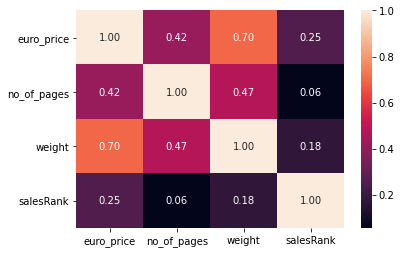

In [ ]:
import seaborn.apionly as sns
import matplotlib.pyplot as plt

corr = df.corr()
print(corr)
print()

sns.heatmap(corr, annot=True, fmt=".2f")

The Price of a book is mildly correlated with the weight of the book  <br>


Top 10 bestsellers

In [ ]:
rslt_df = df.sort_values(by = 'salesRank')
rslt_df.iloc[:10,:]

,publication_date,euro_price,type,category,name,author,publisher,language,no_of_pages,weight,salesRank,short_blurb
609,2020-11-17,27.61,Hardback,biography,A Promised Land,Barack Obama (author),Penguin Books Ltd,English,768,750.0,7.0,"In the stirring, highly anticipated first volu..."
610,2020-11-17,39.85,Hardback,biography,"Dolly Parton, Songteller",Dolly Parton (author),Hodder & Stoughton,English,256,2388.0,23.0,A landmark celebration of the remarkable life ...
851,2020-10-20,32.88,Hardback,foodanddrink,Dessert Person,Claire Saffitz (author),Random House USA Inc,NaN,336,1616.0,28.0,Baking star and Bon Appetit and YouTube celebr...
318,2019-08-08,22.74,Hardback,foodanddrink,East,"Meera Sodha, David Loftus (photographer (expre...",Penguin Books Ltd,English,303,1164.0,30.0,"Modern, vibrant, fuss-free food made from Brit..."
842,2020-11-05,22.08,Hardback,fiction,Gender Swapped Fairy Tales,"Karrie Fransman (author), Jonathan Plackett (a...",Faber & Faber,English,208,960.0,40.0,People have been telling fairy tales to their ...
611,2020-10-15,18.51,Hardback,biography,"Olive, Mabel and Me",Andrew Cotter (author),Black & White Publishing,NaN,224,510.0,41.0,OLIVE & MABEL: two of the internet's favourite...
612,2020-04-02,20.65,Hardback,biography,One Two Three Four,Craig Brown (author),HarperCollins Publishers,English,642,972.0,45.0,<p><strong>WINNER OF THE BAILLIE GIFFORD PRIZE...
166,2012-04-12,9.48,Paperback,fiction,The Song of Achilles,Madeline Miller,Bloomsbury Publishing (UK),English,352,263.0,51.0,A breathtakingly original rendering of the Tro...
333,2009-09-03,25.74,Hardback,foodanddrink,Mary Berry's Baking Bible,Mary Berry,Ebury Publishing,English,399,1310.0,54.0,This definitive collection from the undisputed...
32,2020-11-17,10.80,Paperback,literature,home body,rupi kaur (author),Simon & Schuster UK,English,188,63.0,64.0,From the Number One SundayTimes bestselling au...
